# Classifying 1D with a Single Neuron

This notebook provides you with a complete code example that loads the data in `data_class_1d_clean.csv`, trains a neuron to classify it, and finally uses it to predict the classification of the data in `data_class_1d_clean_test.csv`. 

## Loading the Data

In [1]:
from loader import load_data_1d

(x, y_gt) = load_data_1d(filename="data_class_1d_noisy.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [ 0.25106942 -1.4526217   0.08321064  1.29589268 -1.16278646  0.67081204
 -0.26344517 -0.19462802  0.06992607  0.79651493]
y_gt: [1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]


## Visualizing the Data

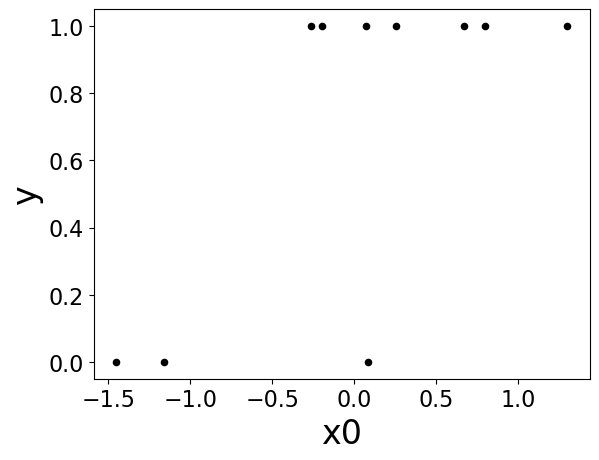

In [2]:
from plotting import plot_data_1d

plot_data_1d(x, y_gt, fig_name="fig_01_06a.pdf")  ### plot_data_1d(x, y_gt)

## Implementing a Single Neuron

Create a single neuron with one scalar weigth `w0` and one input `x` (which can be a scalar or a vector corresponding to multiple inputs) ...

In [3]:
def neuron_clas_1d(w0, x):
    """Artificial neuron for 1D classification.""" 
    return (w0 * x > 0).astype(int)

... randomly initialize its weights ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w0 = rng.standard_normal()

... obtain its predition `y_p` for the input data (which has the same shape as `x`) ...

In [5]:
y_p = neuron_clas_1d(w0, x)

... and visualize its predictions.

In [6]:
from plotting import plot_pred_1d

### plot_pred_1d(x, y_gt, y_p=neuron_clas_1d(w0, x))

## Training the Neuron

Train the neuron ...

In [7]:
num_samples = len(x)
num_train_iterations = 100
eta = .1  # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # Select random sample. 
    x0_selected = x[selected]
    y_gt_selected = y_gt[selected]
    
    y_p_selected = neuron_clas_1d(w0, x0_selected)  # Neuron prediction.
    
    error = y_p_selected - y_gt_selected  # Calculate error.
    
    w0 -= eta * error * x0_selected  # Update neuron weight.

    print(f"i={i} w0={w0:.2f} error={error:.2f}")

i=0 w0=0.39 error=0.00
i=1 w0=0.39 error=0.00
i=2 w0=0.39 error=0.00
i=3 w0=0.37 error=-1.00
i=4 w0=0.35 error=-1.00
i=5 w0=0.35 error=0.00
i=6 w0=0.34 error=-1.00
i=7 w0=0.33 error=1.00
i=8 w0=0.33 error=0.00
i=9 w0=0.33 error=0.00
i=10 w0=0.31 error=-1.00
i=11 w0=0.29 error=-1.00
i=12 w0=0.29 error=0.00
i=13 w0=0.28 error=1.00
i=14 w0=0.28 error=0.00
i=15 w0=0.26 error=-1.00
i=16 w0=0.26 error=0.00
i=17 w0=0.25 error=1.00
i=18 w0=0.25 error=0.00
i=19 w0=0.25 error=0.00
i=20 w0=0.25 error=0.00
i=21 w0=0.25 error=0.00
i=22 w0=0.25 error=0.00
i=23 w0=0.25 error=0.00
i=24 w0=0.25 error=0.00
i=25 w0=0.25 error=0.00
i=26 w0=0.25 error=0.00
i=27 w0=0.25 error=0.00
i=28 w0=0.25 error=0.00
i=29 w0=0.25 error=0.00
i=30 w0=0.24 error=1.00
i=31 w0=0.24 error=0.00
i=32 w0=0.22 error=-1.00
i=33 w0=0.22 error=0.00
i=34 w0=0.22 error=0.00
i=35 w0=0.22 error=0.00
i=36 w0=0.22 error=0.00
i=37 w0=0.22 error=0.00
i=38 w0=0.21 error=1.00
i=39 w0=0.21 error=0.00
i=40 w0=0.21 error=0.00
i=41 w0=0.21 error=

... and plot its performance.

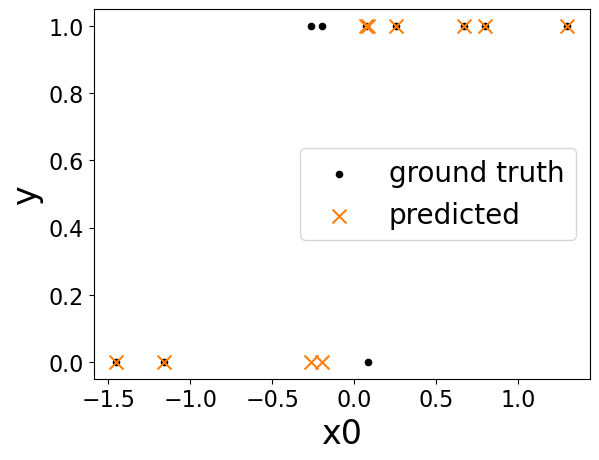

In [8]:
plot_pred_1d(x, y_gt, y_p=neuron_clas_1d(w0, x), fig_name="fig_01_06b.pdf") ### plot_pred_1d(x, y_gt, y_p=neuron_clas_1d(w0, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

In [9]:
### (x_test, y_gt_test) = load_data_1d(filename="data_class_1d_clean_test.csv")

### plot_pred_1d(x_test, y_gt_test, y_p=neuron_clas_1d(w0, x_test))